In [1]:
from sklearn import tree


fr=open('lenses.txt')
lenses=[inst.strip().split('\t') for inst in fr.readlines()]
#数据提取整理，先去左右空格，再用split分割  保存成一个长列表
print (lenses)


[['young', 'myope', 'no', 'reduced', 'no lenses'], ['young', 'myope', 'no', 'normal', 'soft'], ['young', 'myope', 'yes', 'reduced', 'no lenses'], ['young', 'myope', 'yes', 'normal', 'hard'], ['young', 'hyper', 'no', 'reduced', 'no lenses'], ['young', 'hyper', 'no', 'normal', 'soft'], ['young', 'hyper', 'yes', 'reduced', 'no lenses'], ['young', 'hyper', 'yes', 'normal', 'hard'], ['pre', 'myope', 'no', 'reduced', 'no lenses'], ['pre', 'myope', 'no', 'normal', 'soft'], ['pre', 'myope', 'yes', 'reduced', 'no lenses'], ['pre', 'myope', 'yes', 'normal', 'hard'], ['pre', 'hyper', 'no', 'reduced', 'no lenses'], ['pre', 'hyper', 'no', 'normal', 'soft'], ['pre', 'hyper', 'yes', 'reduced', 'no lenses'], ['pre', 'hyper', 'yes', 'normal', 'no lenses'], ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'no', 'normal', 'no lenses'], ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'yes', 'normal', 'hard'], ['presbyopic', 'hyper', 'no', 'redu

In [2]:
lensesLabels=['age','prescript','astigmatic','tearRate']
clf=tree.DecisionTreeClassifier()
lenses=clf.fit(lenses,lensesLabels)


ValueError: could not convert string to float: 'young'

In [ ]:
#fit函数不接受字符串类型数据·

In [3]:
"""在使用fit()函数之前，我们需要对数据集进行编码，这里可以使用两种方法：

LabelEncoder：将字符串转换为增量值
OneHotEncoder：使用One-of-K算法将字符串转换为整数"""
import pandas as pd
with open ('lenses.txt','r') as fr:
    lenses=[inst.strip().split('\t') for inst in fr.readlines()]
lenses_target=[]
for each in lenses:
    lenses_target.append(each[-1])
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']            #特征标签       
lenses_list = []                                                        #保存lenses数据的临时列表
lenses_dict = {}                                                        #保存lenses数据的字典，用于生成pandas
for each_label in lensesLabels:                                            #提取信息，生成字典
    for each in lenses:
        lenses_list.append(each[lensesLabels.index(each_label)])
    lenses_dict[each_label] = lenses_list
    lenses_list = []
print(lenses_dict)                                                        #打印字典信息
lenses_pd = pd.DataFrame(lenses_dict)                                    #生成pandas.DataFrame
print(lenses_pd)   


{'tearRate': ['reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal'], 'age': ['young', 'young', 'young', 'young', 'young', 'young', 'young', 'young', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic'], 'prescript': ['myope', 'myope', 'myope', 'myope', 'hyper', 'hyper', 'hyper', 'hyper', 'myope', 'myope', 'myope', 'myope', 'hyper', 'hyper', 'hyper', 'hyper', 'myope', 'myope', 'myope', 'myope', 'hyper', 'hyper', 'hyper', 'hyper'], 'astigmatic': ['no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes']}
           age astigmatic prescript tearRate
0        young         no     myope 

In [10]:
#将数据序列化
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
import pydotplus
from sklearn.externals.six import StringIO

with open('lenses.txt', 'r') as fr:                                        #加载文件
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]        #处理文件
lenses_target = []                                                        #提取每组数据的类别，保存在列表里
for each in lenses:
    lenses_target.append(each[-1])

lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']            #特征标签       
lenses_list = []                                                        #保存lenses数据的临时列表
lenses_dict = {}                                                        #保存lenses数据的字典，用于生成pandas
for each_label in lensesLabels:                                            #提取信息，生成字典
    for each in lenses:
        lenses_list.append(each[lensesLabels.index(each_label)])
    lenses_dict[each_label] = lenses_list
    lenses_list = []
# print(lenses_dict)                                                        #打印字典信息
lenses_pd = pd.DataFrame(lenses_dict)                                    #生成pandas.DataFrame
print(lenses_pd)                                                        #打印pandas.DataFrame
le = LabelEncoder() #标签编码 OneHotEncoder独热编码.
#创建LabelEncoder()对象，用于序列化            
for col in lenses_pd.columns:                                            #为每一列序列化
    lenses_pd[col] = le.fit_transform(lenses_pd[col])#fit_transform
print(lenses_pd)   


           age astigmatic prescript tearRate
0        young         no     myope  reduced
1        young         no     myope   normal
2        young        yes     myope  reduced
3        young        yes     myope   normal
4        young         no     hyper  reduced
5        young         no     hyper   normal
6        young        yes     hyper  reduced
7        young        yes     hyper   normal
8          pre         no     myope  reduced
9          pre         no     myope   normal
10         pre        yes     myope  reduced
11         pre        yes     myope   normal
12         pre         no     hyper  reduced
13         pre         no     hyper   normal
14         pre        yes     hyper  reduced
15         pre        yes     hyper   normal
16  presbyopic         no     myope  reduced
17  presbyopic         no     myope   normal
18  presbyopic        yes     myope  reduced
19  presbyopic        yes     myope   normal
20  presbyopic         no     hyper  reduced
21  presby

['no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'no lenses']


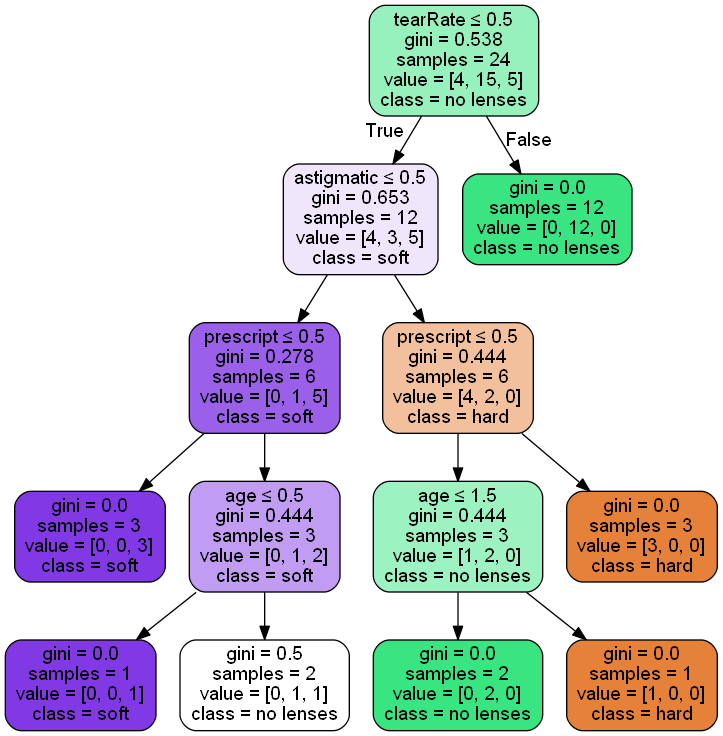

In [6]:
#使用Graphviz可视化决策树
#可视化DTs
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals.six import StringIO
from sklearn import tree
import pandas as pd
import numpy as np
import pydotplus


with open('lenses.txt', 'r') as fr:                                        #加载文件
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]        #处理文件
lenses_target = []                                                        #提取每组数据的类别，保存在列表里
for each in lenses:
    lenses_target.append(each[-1])
print(lenses_target)

lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']            #特征标签       
lenses_list = []                                                        #保存lenses数据的临时列表
lenses_dict = {}                                                        #保存lenses数据的字典，用于生成pandas
for each_label in lensesLabels:                                            #提取信息，生成字典
    for each in lenses:
        lenses_list.append(each[lensesLabels.index(each_label)])
    lenses_dict[each_label] = lenses_list
    lenses_list = []
# print(lenses_dict)                                                        #打印字典信息
lenses_pd = pd.DataFrame(lenses_dict)                                    #生成pandas.DataFrame
# print(lenses_pd)                                                        #打印pandas.DataFrame
le = LabelEncoder()                                                        #创建LabelEncoder()对象，用于序列化           
for col in lenses_pd.columns:                                            #序列化
    lenses_pd[col] = le.fit_transform(lenses_pd[col])
# print(lenses_pd)                                                        #打印编码信息

clf = tree.DecisionTreeClassifier(max_depth = 4)            #创建DecisionTreeClassifier()类
clf = clf.fit(lenses_pd.values.tolist(), lenses_target)          #使用数据，构建决策树
dot_data = StringIO()
tree.export_graphviz(clf, out_file = dot_data,                   #绘制决策树
                    feature_names = lenses_pd.keys(),
                    class_names = clf.classes_,
                    filled=True, rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("tree.pdf")                 #保存绘制好的决策树，以PDF的形式存储。
Image(graph.create_png())

In [7]:
print(clf.predict([[1,1,1,0]]))

['hard']
